# 6.1 Sourcing Open Data: Gun Violence Data

## Table of Contents

### Importing Libraries

### Loading and inspecting Data

### Data Consistency Check

### Replacing missing values with Mean imputation

### Remove Duplicate Values

### Rechecking Missing Values

### Converting Data Types

### Consistency Check

### Outlier Detection & Handling

### Save Cleaned Data

## Importing Libraries

In [102]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and inspecting Data

In [104]:
# This command tells python to remember a main folder path
path = r'/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Original Data'

In [105]:
# simplify the import function
df = pd.read_csv(os.path.join(path, 'gun-violence-data.csv'), index_col = False)

In [106]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [107]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [108]:
df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [109]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [110]:
df.shape

(239677, 29)

In [111]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

# Data Consistency check

In [113]:
# using isnull to find out missing values
df.isnull().values
df.isnull().values.any()
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [114]:
#Find the missing data percentage 
#This is required to judge if a column should be taken into consideration for analysis or not in the current form.
#With the shape we already found the value as (239677, 29) but to make it general we need to find the count at runtime.
missing_data_percentage =(df.isnull().sum()/df.shape[0]) * 100

In [115]:
missing_data_percentage

incident_id                     0.000000
date                            0.000000
state                           0.000000
city_or_county                  0.000000
address                         6.883013
n_killed                        0.000000
n_injured                       0.000000
incident_url                    0.000000
source_url                      0.195263
incident_url_fields_missing     0.000000
congressional_district          4.983373
gun_stolen                     41.513370
gun_type                       41.493760
incident_characteristics        0.136016
latitude                        3.305699
location_description           82.439283
longitude                       3.305699
n_guns_involved                41.493760
notes                          33.802576
participant_age                38.509327
participant_age_group          17.573234
participant_gender             15.171251
participant_name               51.007397
participant_relationship       93.418643
participant_stat

## Replacing missing values with Mean imputation

In [117]:
def impute_data(df):
    # Numerical Columns
    for col in df.select_dtypes(include=['int', 'float']):
        if df[col].isnull().sum() > 0:  
           df.loc[df[col].isnull(), col] = df[col].mean()  
    return df


# Apply the imputation function
df = impute_data(df.copy())

In [118]:
# finally, drop unused columns
cols2drop = ['incident_url', 
             'source_url', 'incident_url_fields_missing', 'incident_characteristics', 'location_description', 'notes', 
             'participant_name', 'participant_relationship', 
              'sources',]
df = df.drop(cols2drop, axis=1)
print(df.shape)
df.sample(5).T

(239677, 20)


,107426,127399,179810,19466,36514
incident_id,483406,825184,811860,184517,190296
date,2016-01-11,2016-05-23,2017-04-03,2014-05-31,2014-09-12
state,Hawaii,Michigan,Louisiana,Missouri,Alabama
city_or_county,Waipahu,Detroit,Baton Rouge,Saint Louis,Birmingham
address,94-795 Lumiaina Street,Beaverland Rd and Eaton,801 Harding Blvd,10701 Lambert International Blvd,248 1st Ave Sw
n_killed,0,0,0,0,0
n_injured,0,1,0,0,1
congressional_district,1.0,13.0,2.0,1.0,7.0
gun_stolen,0::Unknown,0::Unknown||1::Unknown,0::Unknown,NaN,NaN
gun_type,0::Shotgun,0::Unknown||1::Unknown,0::9mm,NaN,NaN


## Remove Duplicate Values

In [120]:
df = df.drop_duplicates()

In [121]:
# Replacing any values with 'unknown' in the cell with NaN
df['gun_type'] = df['gun_type'].mask(df['gun_type'].str.contains('Unknown', na=False), np.nan)
df['date'] = pd.to_datetime(df['date']) #YYYY-MM-DD

df[(df['n_injured'] != 0) | (df['n_killed'] != 0)].copy() 
#Removing all rows where both fields are 0

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.000000,NaN,NaN,40.346700,-79.855900,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.447132,20.47711
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.000000,NaN,NaN,33.909000,-118.333000,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.000000,35.00000
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.000000,0::Unknown||1::Unknown,NaN,41.445500,-82.137700,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.000000,13.00000
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.000000,NaN,NaN,39.651800,-104.802000,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.000000,28.00000
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.000000,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.114000,-79.956900,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.000000,27.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239670,1081752,2018-03-31,Illinois,Chicago,1 block of N Paulina St,0,1,8.001265,0::Unknown,NaN,37.546598,-89.338348,1.000000,0::36,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,55.447132,20.47711
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.000000,0::Unknown,NaN,31.753700,-93.083600,1.000000,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.000000,31.00000
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.000000,0::Unknown,NaN,29.923900,-90.044200,1.000000,0::21,0::Adult 18+,0::Male,0::Injured,0::Victim,85.000000,7.00000
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.000000,0::Unknown,NaN,29.720100,-95.611000,1.000000,0::42,0::Adult 18+,0::Male,0::Killed,0::Victim,149.000000,17.00000


## Rechecking Missing Values

In [123]:
print(df.isnull().sum())

incident_id                    0
date                           0
state                          0
city_or_county                 0
address                    16497
n_killed                       0
n_injured                      0
congressional_district         0
gun_stolen                 99498
gun_type                  198630
latitude                       0
longitude                      0
n_guns_involved                0
participant_age            92298
participant_age_group      42119
participant_gender         36362
participant_status         27626
participant_type           24863
state_house_district           0
state_senate_district          0
dtype: int64


In [124]:
# Statictics analysis
df.describe().T

,count,mean,min,25%,50%,75%,max,std
incident_id,239677.0,559334.346404,92114.0,308545.0,543587.0,817228.0,1083472.0,293128.684285
date,239677,2016-03-13 00:26:19.645940480,2013-01-01 00:00:00,2015-03-07 00:00:00,2016-04-05 00:00:00,2017-04-03 00:00:00,2018-03-31 00:00:00,NaN
n_killed,239677.0,0.25229,0.0,0.0,0.0,0.0,50.0,0.521779
n_injured,239677.0,0.494007,0.0,0.0,0.0,1.0,53.0,0.729952
congressional_district,239677.0,8.001265,0.0,2.0,5.0,10.0,53.0,8.266818
latitude,239677.0,37.546598,19.1114,33.9852,38.1818,41.2851,71.3368,5.045246
longitude,239677.0,-89.338348,-171.429,-93.6009,-86.7674,-80.1367,97.4331,14.120208
n_guns_involved,239677.0,1.372442,1.0,1.0,1.0,1.372442,400.0,3.578322
state_house_district,239677.0,55.447132,1.0,27.0,55.447132,77.0,901.0,38.497149
state_senate_district,239677.0,20.47711,1.0,10.0,20.47711,29.0,94.0,13.211681


## Converting Data Types

In [126]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Display the updated data types
df.dtypes

incident_id                        int64
date                      datetime64[ns]
state                             object
city_or_county                    object
address                           object
n_killed                           int64
n_injured                          int64
congressional_district           float64
gun_stolen                        object
gun_type                          object
latitude                         float64
longitude                        float64
n_guns_involved                  float64
participant_age                   object
participant_age_group             object
participant_gender                object
participant_status                object
participant_type                  object
state_house_district             float64
state_senate_district            float64
dtype: object

## Consistency Check

In [128]:
# Display unique values for categorical columns
for col in ['state', 'city_or_county']:
    print(f"Unique values in {col}: {df[col].unique()}")

# Convert state and city_or_county to title case for consistency
df['state'] = df['state'].str.title()
df['city_or_county'] = df['city_or_county'].str.title()


Unique values in state: ['Pennsylvania' 'California' 'Ohio' 'Colorado' 'North Carolina' 'Oklahoma'
 'New Mexico' 'Louisiana' 'Maryland' 'Tennessee' 'Missouri'
 'District of Columbia' 'Illinois' 'Delaware' 'Utah' 'Michigan' 'Georgia'
 'Indiana' 'Mississippi' 'New York' 'Florida' 'Washington'
 'South Carolina' 'Arizona' 'Kentucky' 'New Jersey' 'Virginia' 'Wisconsin'
 'Rhode Island' 'Texas' 'Alabama' 'Kansas' 'Connecticut' 'West Virginia'
 'Minnesota' 'Nevada' 'Nebraska' 'Massachusetts' 'Hawaii' 'New Hampshire'
 'Iowa' 'Alaska' 'Arkansas' 'Idaho' 'Oregon' 'Wyoming' 'Maine'
 'North Dakota' 'Montana' 'Vermont' 'South Dakota']
Unique values in city_or_county: ['Mckeesport' 'Hawthorne' 'Lorain' ... 'Montgomery Creek'
 'Chaffee (Allenville)' 'St Paul']


## Outlier Detection & Handling

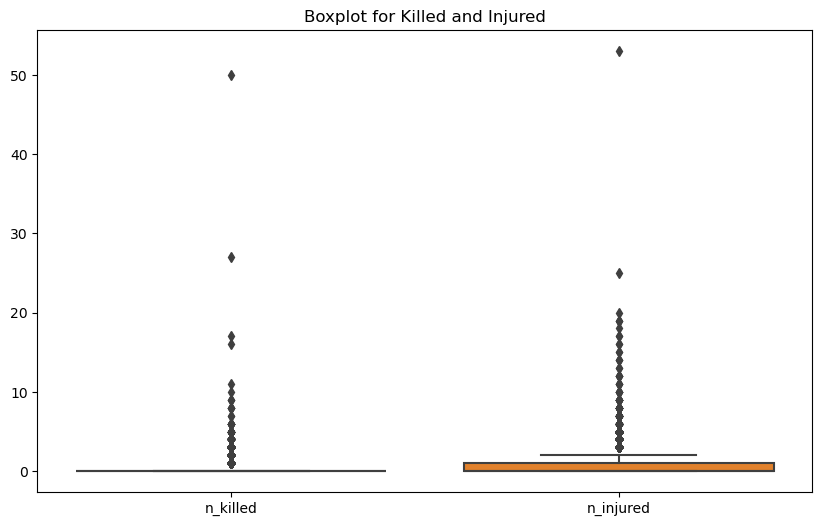

In [130]:
# Plot boxplot for numerical columns to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['n_killed', 'n_injured']])
plt.title('Boxplot for Killed and Injured')
plt.show()

# Handling outliers by capping values
# You can choose appropriate thresholds based on your data distribution
threshold = df['n_killed'].quantile(0.99)
df['n_killed'] = np.where(df['n_killed'] > threshold, threshold, df['n_killed'])
threshold = df['n_injured'].quantile(0.99)
df['n_injured'] = np.where(df['n_injured'] > threshold, threshold, df['n_injured'])


In [131]:
# Assign df to a new variable called data_cleaned
data_cleaned = df

In [132]:
data_cleaned.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,3.0,14.0,NaN,NaN,40.3467,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.447132,20.47711
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,43.0,NaN,NaN,33.9090,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.000000,35.00000
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1.0,3.0,9.0,0::Unknown||1::Unknown,NaN,41.4455,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.000000,13.00000
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,2.0,0.0,6.0,NaN,NaN,39.6518,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.000000,28.00000
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.000000,27.00000


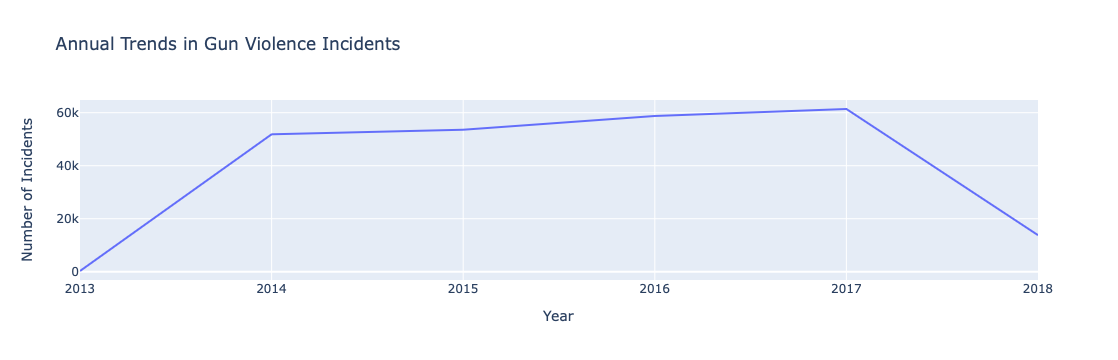

In [133]:
# Extract the year from the incident_date to analyze annual trends
data_cleaned['year'] = data_cleaned['date'].dt.year

# Group data by year and count incidents
yearly_counts = data_cleaned.groupby('year').size().reset_index(name='count')

# Visualizing the trend
fig = px.line(yearly_counts, x='year', y='count', title='Annual Trends in Gun Violence Incidents',
              labels={'count': 'Number of Incidents', 'year': 'Year'})
fig.show()

## Save Cleaned Data

In [135]:
path = r'/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data'

In [136]:
data_cleaned.to_csv(os.path.join(path,'prepared.csv'))

In [137]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('gun_violence_data_cleaned.csv', index=False)